# Preconditioned Model Building (PMB)

PMB is a method for solving differentiable unconstrained optimization problems. The method requires two arguments: a handle to the objective function, $f:\mathbb{R}^n \mapsto \mathbb{R}$ and an initial starting solution, $x_0 \in \mathbb{R}^n$. The function handle should return the function value as well as the gradient vector. There is also an optional third argument ```pars```, which is used to specify different parameters (more on this later). 

Here are six functions that we shall use for demonstrating PMB.

In [18]:
include("testfunctions.jl")
funcs = [rosenbrock, fletchcr, eg2, liarwhd, edensch, nonscomp];

Let's start with the well-known ```rosenbrock```. The optimal objective function value for this function is 0.0. First we need to include the PMB solver called ```pmbsolve```.

In [2]:
include("pmbsolve.jl")

pmbsolve (generic function with 2 methods)

We then create a handle to the function and an initial starting solution.

In [9]:
fun = funcs[1] # handle to the function
n = 10 # dimension of the problem
# initial starting solution
x0 = 5.0 + rand(n)*10.0;

In [10]:
pmbout = pmbsolve(fun, x0);

Function value decreases less than ftol


Here is the output structure.

In [11]:
fieldnames(pmbout)

10-element Array{Symbol,1}:
 :x     
 :fval  
 :g     
 :fhist 
 :nghist
 :fcalls
 :niter 
 :nmbs  
 :exit  
 :time  

The description of each field is given below:
* ```fcalls```: Total number of function calls to solve the problem
* ```nmbs```: Total number of times a model is built during the inner iterations
* ```exit```: Exit status (the associated parameters with each status is given in parantheses)
    * 1: First order condition is met (```pars.gtol```)
    * 0: Maximum number of inner iterations is reached (```pars.maxiniter```)
    * -1: Maximum number of iterations is reached (```pars.maxiter```)
    * -2: Maximum number of function calls is reached (```pars.maxfcalls```)
    * -3: Time limit is reached (```pars.maxtime```)
    * -4: Change in function value between two consecutive iterations is below tolerance (```pars.ftol```)
* ```time```: Time to solve the problem in seconds
* ```x```: Final solution
* ```g```: Final gradient at $x$
* ```niter```: Number of iterations

In [12]:
println("Objective function value: ", pmbout.fval)
println("Norm of the gradient: ", norm(pmbout.g, Inf))
println("Number of function calls: ", pmbout.fcalls)
println("Number of iterations: ", pmbout.niter)
println("Number of model building steps: ", pmbout.nmbs)
println("Time in seconds: ", pmbout.time)

Objective function value: 9.475177814566292e-10
Norm of the gradient: 0.0006696419664557355
Number of function calls: 143
Number of iterations: 100
Number of model building steps: 43
Time in seconds: 0.3386859893798828


How about a large-scale version of the same problem?

In [13]:
n = 1000
x0 = 5.0 + rand(n)*10.0
pmbout = pmbsolve(fun, x0)
println("Objective function value: ", pmbout.fval)
println("Norm of the gradient: ", norm(pmbout.g, Inf))
println("Number of function calls: ", pmbout.fcalls)
println("Number of iterations: ", pmbout.niter)
println("Number of model building steps: ", pmbout.nmbs)
println("Time in seconds: ", pmbout.time)

Function value decreases less than ftol
Objective function value: 4.946259545534196e-9
Norm of the gradient: 0.002107824424989932
Number of function calls: 245
Number of iterations: 82
Number of model building steps: 63
Time in seconds: 0.040992021560668945


We can also try other functions with even larger dimensions. For instance a 100K-dimensional ```nonscomp```, whose optimal objective function value is again 0.0.

In [15]:
fun = funcs[6]
n = 100000
x0 = 5.0 + rand(n)*10.0
pmbout = pmbsolve(fun, x0)
println("Objective function value: ", pmbout.fval)
println("Norm of the gradient: ", norm(pmbout.g, Inf))
println("Number of function calls: ", pmbout.fcalls)
println("Number of iterations: ", pmbout.niter)
println("Number of model building steps: ", pmbout.nmbs)
println("Time in seconds: ", pmbout.time)

Function value decreases less than ftol
Objective function value: 1.2032107072350768e-8
Norm of the gradient: 0.000642952821870513
Number of function calls: 308
Number of iterations: 55
Number of model building steps: 71
Time in seconds: 1.6493680477142334


## Options

The solver also takes an optional argument ```pars```. This parameter has the following fields. Note that the default values of the parameters are given in parantheses:

* ```M```: The memory size for the preconditioner (```5```)
* ```gtol```: The tolerance for the first-order optimality (```1.0e-5```)
* ```ftol```: The normalized difference between two consecutive function values (```1.0e-8```)
* ```display```: To display information about the progress in every iteration (```false```)
* ```message```: Shows a message about the exit condition or errors (```true```)
* ```history```: Stores the function values and the first-order errors throughout the iterations (```false```) 
* ```maxiter```: Maximum number of iterations (```1000```)
* ```maxiniter```: Maximum number of inner iterations for model building (```100```)
* ```maxfcalls```: Maximum number of function calls (```1000```)
* ```maxtime```: Maximum computation time in seconds (```3600```)

To change one of these parameters, we need to specify the value by using ```pars``` keyword defined within ```pmbsolve```. Suppose that we want to plot the progress of the objective function values when ```pmbsolve``` is called for 100-dimensional ```fletchcr``` (optimal objective function value is 0.0).

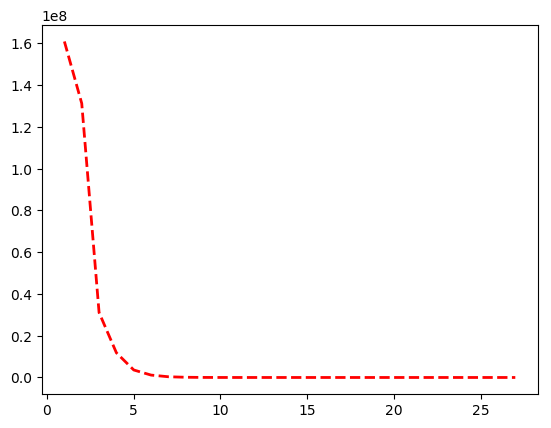

Iter: 1 ===> 	 f = 160869524.586439 	 norm(g) = 13596.557454
Iter: 2 ===> 	 f = 131222887.358407 	 norm(g) = 11033.170501
Iter: 3 ===> 	 f = 31077182.042412 	 norm(g) = 3683.443430
Iter: 4 ===> 	 f = 11798623.119479 	 norm(g) = 1626.527669
Iter: 5 ===> 	 f = 3587560.425046 	 norm(g) = 698.877222
Iter: 6 ===> 	 f = 1145427.247675 	 norm(g) = 276.576436
Iter: 7 ===> 	 f = 345072.043188 	 norm(g) = 132.431268
Iter: 8 ===> 	 f = 99976.767518 	 norm(g) = 49.601877
Iter: 9 ===> 	 f = 26352.756125 	 norm(g) = 29.287126
Iter: 10 ===> 	 f = 5931.343865 	 norm(g) = 15.018123
Iter: 11 ===> 	 f = 1031.071951 	 norm(g) = 12.191529
Iter: 12 ===> 	 f = 53.071468 	 norm(g) = 3.532331
Iter: 13 ===> 	 f = 37.075824 	 norm(g) = 6.369045
Iter: 14 ===> 	 f = 2.501491 	 norm(g) = 0.672746
Iter: 15 ===> 	 f = 1.077525 	 norm(g) = 0.147941
Iter: 16 ===> 	 f = 0.499614 	 norm(g) = 0.124449
Iter: 17 ===> 	 f = 0.027903 	 norm(g) = 0.091206
Iter: 18 ===> 	 f = 0.012052 	 norm(g) = 0.032381
Iter: 19 ===> 	 f = 0.

In [20]:
fun = funcs[2]
n = 100
x0 = 5.0 + rand(n)*10.0
pars.history = true
pars.display = true
pmbout = pmbsolve(fun, x0, pars) # NOTE the third optional argument

Pkg.add("PyPlot")
using PyPlot
x = 1:length(pmbout.fhist)
plot(x, pmbout.fhist, color="red", linewidth=2.0, linestyle="--");